In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Define the file path
file_pattern = '/home/ABTLUS/victor.secco/data_processing/Eletroquímica/ECSA/PtSe2*mvS.txt'

# Load all files matching the pattern
all_files = glob.glob(file_pattern)

# Initialize an empty list to store DataFrames
data_frames = []

# Process each file
data_frames = []

# Process each file
for file in all_files:
    # Load the data from the file with the correct delimiter and decimal separator
    data = pd.read_csv(file, sep=';', decimal=',')
    
    # Discard rows where the "Scan" column is equal to 1
    cropped_data = data[data['Scan'] != 1]
    
    # Append the cropped DataFrame to the list
    data_frames.append((file, cropped_data))

data_frames.sort()

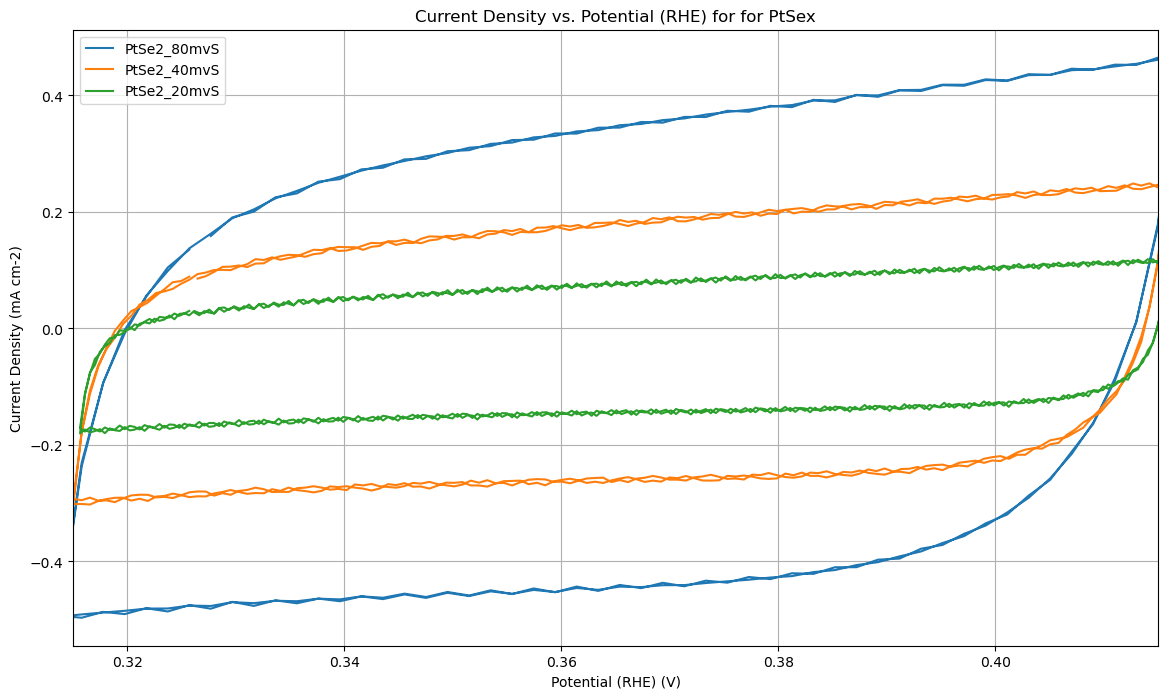

In [54]:
plt.figure(figsize=(14, 8))

for file, data in data_frames[:2:-1]:
    plt.plot(data['Potential (RHE) (V)'], data['Current Density (mA cm-2)'], label=file.split('/')[-1][:-4])

plt.xlim(0.315, 0.415)
plt.xlabel('Potential (RHE) (V)')
plt.ylabel('Current Density (mA cm-2)')
plt.title('Current Density vs. Potential (RHE) for for PtSex')
plt.legend()
plt.grid(True)
plt.show()

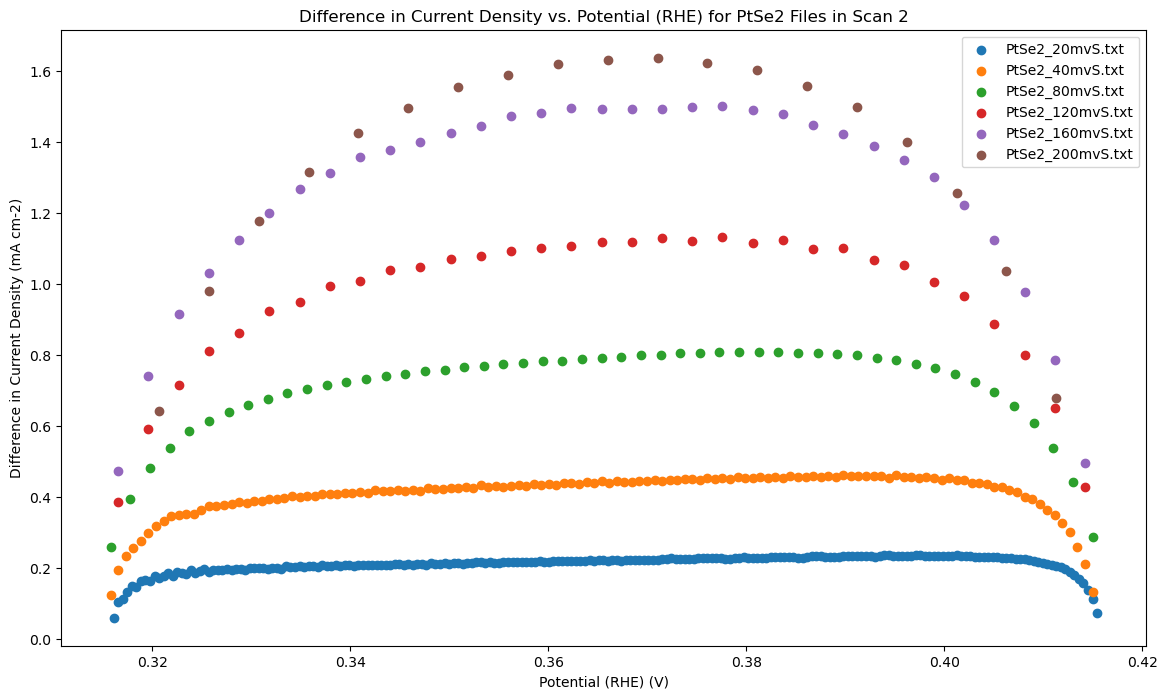

In [124]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Define the file path pattern for PtSe2 files only
file_pattern = '/home/ABTLUS/victor.secco/data_processing/Eletroquímica/ECSA/PtSe2*mvS.txt'

# Load all files matching the pattern
all_files = glob.glob(file_pattern)

def extract_key(filename):
    # Assuming the key is part of the filename, e.g., 'PtSe2_123', extract '123'
    # Modify this as needed to match your filename structure
    key_part = filename.split('/')[-1].split('_')[1].replace('mvS.txt', '')
    return int(key_part)

# Sort files based on the extracted key
all_files.sort(key=extract_key)

# Initialize an empty list to store DataFrames
data_frames = []
max_differences = {}

# Specific scan to filter
specific_scan = 2

# Process each file
for file in all_files:
    # Load the data from the file with the correct delimiter and decimal separator
    data = pd.read_csv(file, sep=';', decimal=',')
    
    # Filter to include only the specific scan
    scan_data = data[data['Scan'] == specific_scan]
    
    # Append the filtered DataFrame to the list
    data_frames.append((file, scan_data))

# Plotting each PtSe2 file's data and calculating the difference in current density
plt.figure(figsize=(14, 8))

for file, data in data_frames:
    potential_values = data['Potential (RHE) (V)'].unique()
    differences = []
    
    for potential in potential_values:
        potential_data = data[data['Potential (RHE) (V)'] == potential]
        if len(potential_data) > 1:
            current_densities = potential_data['Current Density (mA cm-2)'].values
            difference = max(current_densities) - min(current_densities)
            differences.append((potential, difference))
            
    if differences:
        max_difference = max(differences[1])
        max_differences[file.split('/')[-1]] = max_difference

    if differences:
        potentials, current_differences = zip(*differences)
        plt.scatter(potentials, current_differences, label=file.split('/')[-1])
    


plt.xlabel('Potential (RHE) (V)')
plt.ylabel('Difference in Current Density (mA cm-2)')
plt.title('Difference in Current Density vs. Potential (RHE) for PtSe2 Files in Scan 2')
plt.legend()
plt.show()


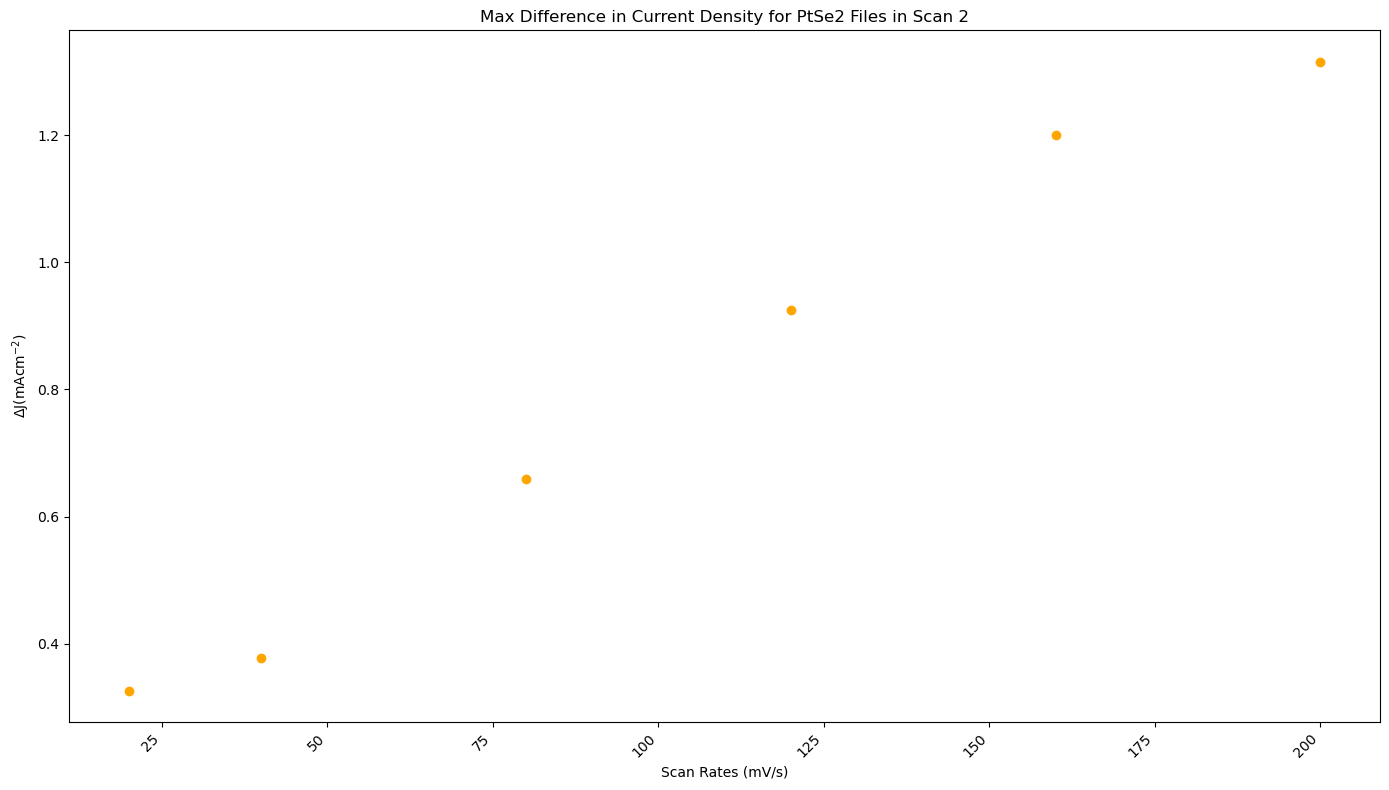

In [129]:
import numpy as np
scan_rates = [20, 40, 80, 120, 160, 200]

max_diff_values = list(max_differences.values())

plt.figure(figsize=(14, 8))
plt.scatter(scan_rates, max_diff_values, color='orange')
plt.xlabel('Scan Rates (mV/s)')
plt.ylabel(r'$\rm{ΔJ (mA cm^{-2})}$')
plt.title('Max Difference in Current Density for PtSe2 Files in Scan 2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [123]:
max_differences.sort()

AttributeError: 'dict' object has no attribute 'sort'